<h2>Instalacion de librerias </h2>


In [ ]:
#%pip install -r ../requirements.txt

<h2> Importacion de libreria </h2>

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Rutas 

In [3]:
path = '../path.txt'

## Funciones


## Extraccion

In [7]:
with open(path, 'r') as archivo:
    for linea in archivo.readlines():
        exec(linea.strip(), globals())

In [8]:
df_afv = pd.read_csv(Alternative_Fuel, encoding='utf-8')
pd.set_option('display.max_columns', None)
df_afv.sample(5)

,Category,Model,Model Year,Manufacturer,Fuel,All-Electric Range,PHEV Total Range,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,Conventional Fuel Economy City,Conventional Fuel Economy Highway,Conventional Fuel Economy Combined,Transmission Type,Transmission Make,Engine Type,Engine Size,Engine Cylinder Count,Number of Passengers,Heavy-Duty Power System,Notes,Drivetrain
229,Sedan/Wagon,EQS 580 4MATIC,2022.0,Mercedes-Benz,Electric,340.0,NaN,92.0,99.0,95.0,NaN,NaN,NaN,Auto,NaN,e-motor,135 and 255 kW electric motors,NaN,NaN,NaN,NaN,AWD
404,Sedan/Wagon,Mustang Mach-E GT AWD,2021.0,Ford,Electric,270.0,NaN,90.0,77.0,84.0,NaN,NaN,NaN,Auto,NaN,e-motor,179 kW electric motors (X2),NaN,NaN,NaN,NaN,AWD
438,SUV,CR-V AWD,2021.0,Honda,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,40.0,35.0,38.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,NaN
509,Sedan/Wagon,E 450 4MATIC (Coupe),2021.0,Mercedes-Benz,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,23.0,30.0,25.0,Auto,NaN,SI,3.0L,6.0,NaN,NaN,NaN,NaN
851,Transit Bus,ZX5+ 40-Foot Bus - Class 8,NaN,Proterra,Electric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,Proterra ProDrive™ 250kW permanent magnet moto...,According to manufacturer: 550HP peak; 440 kWh...,NaN


## Transformacion de datos 

In [9]:
df_afv.columns
df_afv.rename(columns={'Category':'category', 'Model': 'model', 'Model Year':'model_year', 'Manufacturer':'manufacturer'
    , 'Fuel': 'fuel','All-Electric Range': 'all_electric_range', 'PHEV Total Range':'PHEV_total_range',
       'Alternative Fuel Economy City': 'alternative_fuel_economy_city', 'Alternative Fuel Economy Highway':'alternative_fuel_economy_highway',
       'Alternative Fuel Economy Combined': 'alternative_fuel_economy_combined', 'Conventional Fuel Economy City': 'conventional_fuel_economy_city',
       'Conventional Fuel Economy Highway': 'conventional_fuel_economy_highway',
       'Conventional Fuel Economy Combined': 'conventional_fuel_economy_combined'
    }, inplace = True)

In [12]:
df_afv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   category                            882 non-null    object 
 1   model                               882 non-null    object 
 2   model_year                          594 non-null    float64
 3   manufacturer                        882 non-null    object 
 4   fuel                                882 non-null    object 
 5   all_electric_range                  222 non-null    float64
 6   PHEV_total_range                    43 non-null     float64
 7   alternative_fuel_economy_city       169 non-null    float64
 8   alternative_fuel_economy_highway    169 non-null    float64
 9   alternative_fuel_economy_combined   262 non-null    float64
 10  conventional_fuel_economy_city      444 non-null    float64
 11  conventional_fuel_economy_highway   444 non-n

### Eliminacion de columnas innecesarias

In [3]:
df_afv = df_afv.drop(columns={'Transmission Type', 'Transmission Make', 'Number of Passengers','Engine Type', 'Engine Size', 'Engine Cylinder Count',
                        'Heavy-Duty Power System', 'Notes', 'Drivetrain'})

### Verificacion del tipo de dato de las columnas

In [6]:
df_afv['model_year'] = df_afv['model_year'].astype('Int64')

### Verificacion de valores nulos

In [7]:
df_afv.isna().sum()

category                                0
model                                   0
model_year                            288
manufacturer                            0
fuel                                    0
all_electric_range                    660
PHEV_total_range                      839
alternative_fuel_economy_city         713
alternative_fuel_economy_highway      713
alternative_fuel_economy_combined     620
conventional_fuel_economy_city        438
conventional_fuel_economy_highway     438
conventional_fuel_economy_combined    438
dtype: int64

Se elige conservar los valores nulos en lugar de eliminarlos, ya que eliminarlos afectaría otras columnas relevantes para el análisis. Esto significa que aunque haya datos faltantes en ciertas áreas, se prefieren mantener para evitar perder información valiosa que podría ser crucial para entender el conjunto de datos en su totalidad.

### Verficacion de duplicados

In [11]:
df_afv.duplicated().value_counts()

False    880
True       2
Name: count, dtype: int64

In [12]:
# Eliminamos los duplicados
df_afv.drop_duplicates(inplace=True)

## Realizamos un Analisis descriptivo

In [13]:
df_afv.describe()

,model_year,all_electric_range,PHEV_total_range,alternative_fuel_economy_city,alternative_fuel_economy_highway,alternative_fuel_economy_combined,conventional_fuel_economy_city,conventional_fuel_economy_highway,conventional_fuel_economy_combined
count,593.0,222.000000,43.000000,169.000000,169.000000,262.000000,443.000000,443.000000,443.000000
mean,2021.539629,165.927928,450.465116,84.585799,77.591716,75.992366,25.907449,30.085779,27.264108
std,0.498848,132.992955,93.042578,39.430696,32.735123,32.303279,10.872066,12.830142,9.814812
min,2021.0,8.000000,290.000000,10.000000,12.000000,11.000000,13.000000,16.000000,15.000000
25%,2021.0,23.000000,380.000000,71.000000,66.000000,56.000000,19.000000,24.000000,21.000000
50%,2022.0,203.000000,460.000000,94.000000,85.000000,76.000000,22.000000,28.000000,24.000000
75%,2022.0,260.000000,520.000000,115.000000,99.000000,101.000000,28.000000,33.000000,30.000000
max,2022.0,520.000000,640.000000,150.000000,133.000000,142.000000,59.000000,231.000000,59.000000


El objetivo es crear un conjunto de datos que enumere las categorías de vehículos aptos para la flota junto con su rendimiento en términos de autonomía. 
Según nuestra investigación, la autonomía promedio para vehículos totalmente eléctricos es de 166 millas, para híbridos enchufables es de 450 millas y para vehículos convencionales de combustible es de 443 millas. 
Queremos determinar qué categorías de vehículos son viables para nuestro modelo de negocio en función de estos datos. Esto implica comprender las diferencias de rendimiento entre las diferentes categorías de vehículos para tomar decisiones informadas sobre qué tipos de vehículos deberíamos considerar para nuestra flota.

In [14]:
df_afv['category'].value_counts()

category
Sedan/Wagon                      282
SUV                              222
Pickup                            79
Transit Bus                       76
Vocational/Cab Chassis            68
Passenger Van/Shuttle Bus         46
Van                               23
Street Sweeper                    21
School Bus                        21
Refuse                            16
Tractor                           15
Step Van                           5
TractorVocational/Cab Chassis      4
Vocational/Cab ChassisVan          1
Vocational/Cab ChassisTractor      1
Name: count, dtype: int64

Hemos restringido las categorías de vehículos a 'Sedan' y 'SUV' basándonos en el tamaño y la cantidad de pasajeros que pueden acomodar, ya que estas son las únicas categorías operativas para nuestro negocio. Por lo tanto, hemos creado un nuevo conjunto de datos que incluye solo vehículos de estas dos categorías. Esto nos permitirá centrarnos en los tipos de vehículos que mejor se adaptan a nuestras necesidades comerciales específicas, lo que facilitará la toma de decisiones relacionadas con la flota.

In [15]:
df_categorias = df_afv.loc[df_afv['category'].isin(['Sedan/Wagon', 'SUV'])]
df_categorias.head()

,category,model,model_year,manufacturer,fuel,all_electric_range,PHEV_total_range,alternative_fuel_economy_city,alternative_fuel_economy_highway,alternative_fuel_economy_combined,conventional_fuel_economy_city,conventional_fuel_economy_highway,conventional_fuel_economy_combined
0,Sedan/Wagon,NSX,2022,Acura,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,21.0,22.0,21.0
1,Sedan/Wagon,A3,2022,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,29.0,38.0,32.0
2,Sedan/Wagon,A3 quattro,2022,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,28.0,36.0,31.0
3,Sedan/Wagon,A4 allroad quattro,2022,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,24.0,30.0,26.0
4,Sedan/Wagon,A4 quattro,2022,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,26.0,34.0,29.0


In [16]:
df_categorias['fuel'].value_counts()

fuel
Hybrid Electric            254
Electric                   125
Plug-in Hybrid Electric     91
Biodiesel (B20)             22
Hydrogen Fuel Cell          10
Ethanol (E85)                2
Name: count, dtype: int64

Los vehículos Sedan/Wagon y SUV mostramos sus detalles. También presentamos la distribución de tipos de combustible en estas categorías y sus opciones de combustible.

## Grafico de barras 'Rendimiento en millas por categoria de vehículo'

Text(0.5, 0, 'Categoria')

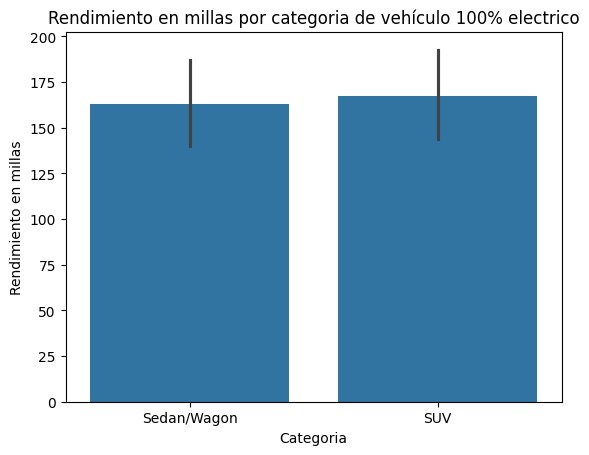

In [17]:
sns.barplot(x = df_categorias['category'] , y = df_categorias['all_electric_range'])
plt.title('Rendimiento en millas por categoria de vehículo 100% electrico')
plt.ylabel(ylabel='Rendimiento en millas')
plt.xlabel(xlabel='Categoria')

Este análisis indica que tanto los Sedan como los SUV totalmente eléctricos tienen autonomías similares. Esto sugiere que, en términos de autonomía, la elección entre estos dos tipos de vehículos eléctricos podría basarse más en las preferencias del cliente y en otros factores, en lugar de en la capacidad de viaje.

Text(0.5, 0, 'Categoria')

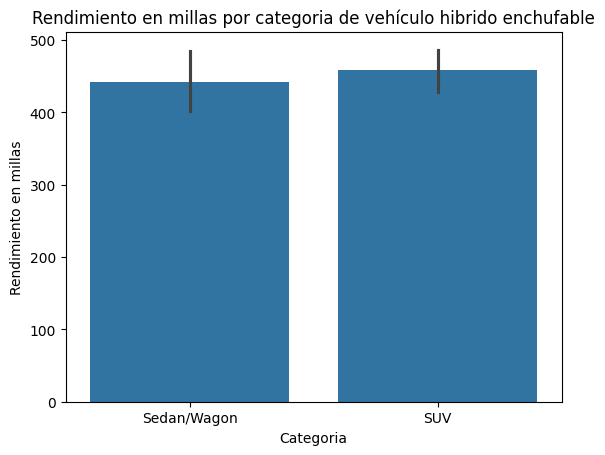

In [18]:
sns.barplot(x = df_categorias['category'] , y = df_categorias['PHEV_total_range'])
plt.title('Rendimiento en millas por categoria de vehículo hibrido enchufable')
plt.ylabel(ylabel='Rendimiento en millas')
plt.xlabel(xlabel='Categoria')

El análisis revela que tanto los Sedan como los SUV tienen una autonomía cercana a las 450 millas, lo que sugiere que ambos tipos de vehículos eléctricos ofrecen una capacidad de viaje comparable.

Text(0.5, 0, 'Categoria')

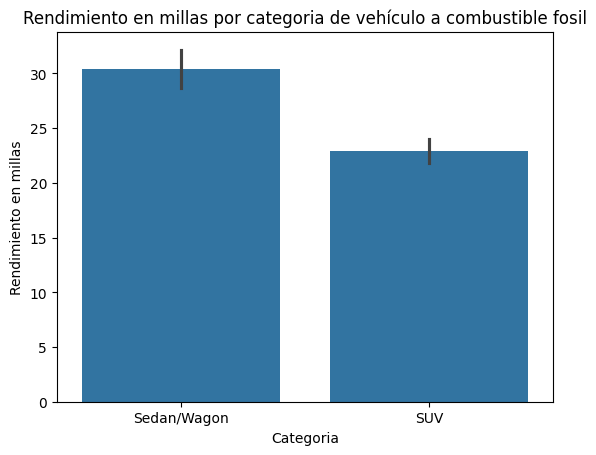

In [19]:
sns.barplot(x = df_categorias['category'] , y = df_categorias['conventional_fuel_economy_city'])
plt.title('Rendimiento en millas por categoria de vehículo a combustible fosil')
plt.ylabel(ylabel='Rendimiento en millas')
plt.xlabel(xlabel='Categoria')

El Sedan muestra una mejor autonomía, probablemente debido a características específicas del diseño o la tecnología empleada en este tipo de vehículo.

## Verificamos si hay presencia de Outliers

Text(0, 0.5, 'Rendimiento en millas ')

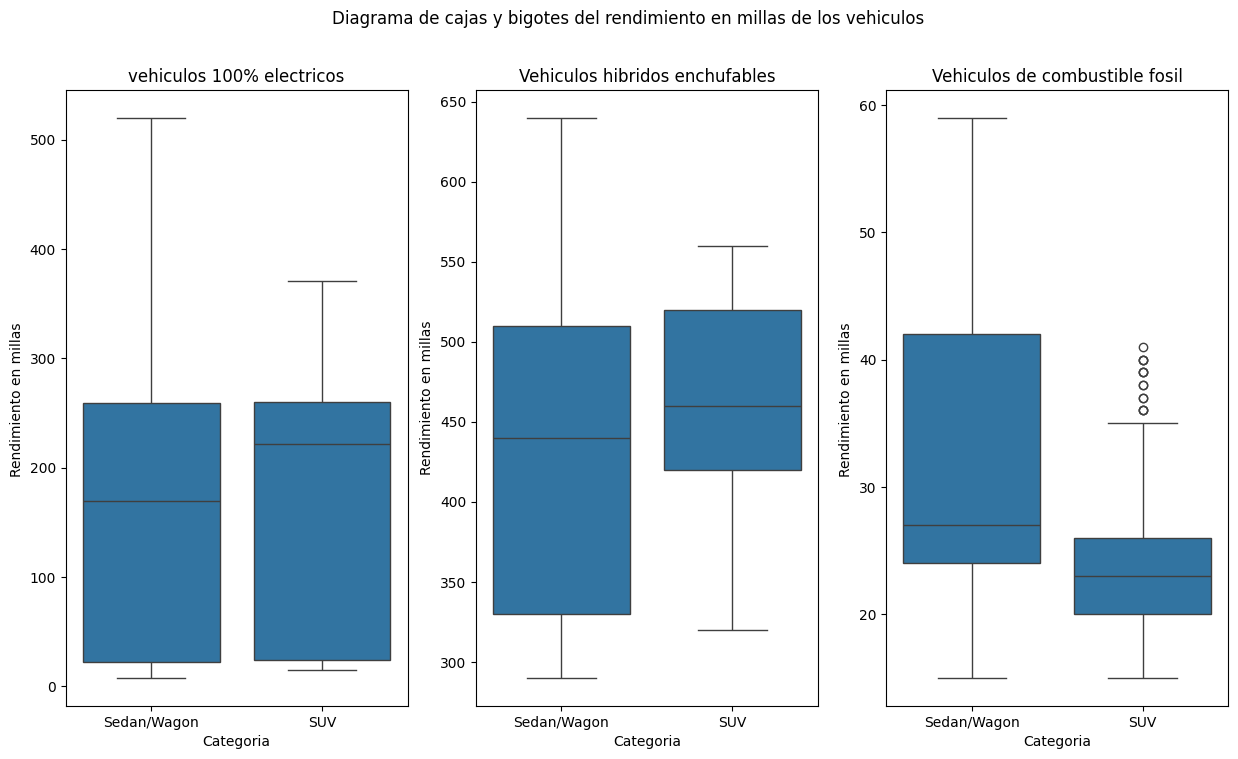

In [20]:
# Se hace el grafico de caja de bigotes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 8))
sns.boxplot(x = df_categorias.category, y = df_categorias.all_electric_range, ax=axes[0])
plt.suptitle('Diagrama de cajas y bigotes del rendimiento en millas de los vehiculos')
axes[0].set_title('vehiculos 100% electricos')
axes[0].set_xlabel('Categoria')
axes[0].set_ylabel('Rendimiento en millas ')

sns.boxplot(x = df_categorias.category, y = df_categorias.PHEV_total_range, ax=axes[1])
axes[1].set_title('Vehiculos hibridos enchufables')
axes[1].set_xlabel('Categoria')
axes[1].set_ylabel('Rendimiento en millas')

sns.boxplot(x = df_categorias.category, y = df_categorias.conventional_fuel_economy_combined, ax=axes[2])
axes[2].set_title('Vehiculos de combustible fosil')
axes[2].set_xlabel('Categoria')
axes[2].set_ylabel('Rendimiento en millas ')

In [21]:
df_categorias.head(1)

,category,model,model_year,manufacturer,fuel,all_electric_range,PHEV_total_range,alternative_fuel_economy_city,alternative_fuel_economy_highway,alternative_fuel_economy_combined,conventional_fuel_economy_city,conventional_fuel_economy_highway,conventional_fuel_economy_combined
0,Sedan/Wagon,NSX,2022,Acura,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,21.0,22.0,21.0


Se detectan valores atípicos en los vehículos de combustión de fósiles, lo que sugiere que algunos de estos vehículos pueden tener rendimientos inusuales o fuera de lo común en comparación con el resto de la muestra.

In [22]:
df_outliers = df_categorias[(df_categorias['category']== 'SUV') & (df_categorias['conventional_fuel_economy_combined'] >36)]
df_outliers

,category,model,model_year,manufacturer,fuel,all_electric_range,PHEV_total_range,alternative_fuel_economy_city,alternative_fuel_economy_highway,alternative_fuel_economy_combined,conventional_fuel_economy_city,conventional_fuel_economy_highway,conventional_fuel_economy_combined
90,SUV,Escape FWD PHEV,2022,Ford,Plug-in Hybrid Electric,37.0,520.0,NaN,NaN,105.0,43.0,38.0,41.0
134,SUV,CR-V AWD,2022,Honda,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,40.0,35.0,38.0
174,SUV,Sorento Hybrid FWD,2022,Kia,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,39.0,35.0,37.0
194,SUV,NX 350h AWD,2022,Lexus,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,41.0,37.0,39.0
297,SUV,RAV4 Hybrid AWD,2022,Toyota,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,41.0,38.0,40.0
303,SUV,Venza AWD,2022,Toyota,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,40.0,37.0,39.0
390,SUV,Escape FWD PHEV,2021,Ford,Plug-in Hybrid Electric,37.0,NaN,NaN,NaN,105.0,43.0,38.0,40.0
438,SUV,CR-V AWD,2021,Honda,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,40.0,35.0,38.0
469,SUV,Sorento Hybrid,2021,Kia,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,39.0,35.0,37.0
578,SUV,RAV4 Hybrid AWD,2021,Toyota,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,41.0,38.0,40.0


## Comparación de Costos: Evaluando el Gasto en Dólares por Opción de Vehículo

### Carro hibrido enchufable

In [23]:
# Automia de 450 km
galones = 13.2
valor_galon = 4.05
cant_kwatts = 20
valor_kwatts = 0.15
gasto_hev = galones* valor_galon + cant_kwatts * valor_kwatts
gasto_hev

56.459999999999994

### Carro electrico 100%

In [24]:
# Automia de 450 km
gasto_ev = valor_kwatts * 450
gasto_ev

67.5

### Carro a combustible

In [25]:
# para recorrer 450 millas es necesario 15 galones
gasto_conv = valor_galon * 15
gasto_conv

60.75

## Guardamos un dataset limpio

In [27]:
df_afv.to_csv("../Datasets/Alternative_Fuel_VehiclesUS_cleaned.csv")